In [1]:
import pickle
import heron
import heron.regression
from heron import sampling

In [2]:
class Prior(object):
    """
    A prior probability distribution.
    """
    pass

class Normal(Prior):
    """
    A normal prior probability distribution.
    """
    
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        distro = stats.norm(self.mean, self.std)
        
    def logp(self, x):
        return distro.logpdf(x)

In [3]:
gp  = heron.regression.load("/home/daniel/repositories/heron/scripts/IMRPhenomPv2.gp")

In [28]:
import numpy as np
gp.update()
sample_locs = sampling.draw_samples(gp, 
                                    t=(-0, 1.0,5000), 
                                    q=(6.0))#, logP1=1.0, gamma1=4, gamma2=6, gamma3=10)
#pred_phase = gp.prediction(sample_locs.T)

In [29]:
pred_phase = gp.gp.predict(gp.training_y[:,0], sample_locs.T, return_var=True)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("/home/daniel/thesis/thesis-style.mpl")
plt.imshow(pred_phase[0].reshape(100,100).T, cmap="magma", alpha=0.75, origin='lower')
plt.colorbar()

ValueError: cannot reshape array of size 5000 into shape (100,100)

In [ ]:
plt.scatter(gp.training_data[:,0], gp.training_data[:,1])

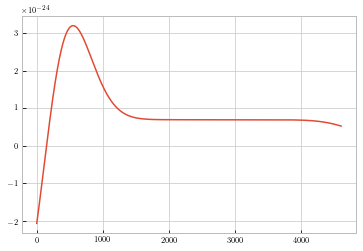

In [31]:
plt.plot(pred_phase[0][200:4800])#.reshape(100,100).T[4])
#plt.plot(pred_phase[0] + pred_phase[1]**2)

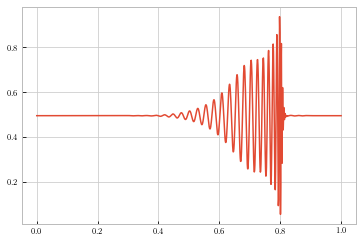

In [32]:
plt.plot(gp.training_data[4000:5000,0], gp.training_y[4000:5000,0])

In [33]:
gp.training_object.normaliser

{'label': (array([ -4.75439320e-22]), array([  9.58388633e-22])),
 'target': (array([-0.4,  1. ]), array([ 0.5,  8. ]))}